![](images/header_18.png)<br>

## TensorFlow y Keras

TensorFlow es una biblioteca para cómputo simbólico sobre conjuntos de datos representados como tensores, que resulta ser de gran utilidad para diferentes técnicas de análisis de datos, destacándose las técnicas de aprendizaje automático como las redes neuronales.

Keras, por otra parte, es una biblioteca para la implementación de redes neuronales profundas que utiliza bibliotecas de más bajo nivel como Tehano, Microsoft Cognitive Toolkit, PlaidML y TensorFlow. Keras ofrece una interfaz más amistosa al usuario, para el desarrollo de aplicaciones en redes neuronales profundas, que las que ofrecen las bibliotecas *backend*. 

A continuación, utilizamos Keras/TensorFlow para problemas de clasificación (con los datos de flores iris y los datos de diabetes de los indios Pima) y de regresión (con los datos del atractor de Lorenz).

### Conjunto de datos de flores iris

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sklearn.datasets import load_iris
iris_data = load_iris()

X = iris_data['data']
y = iris_data['target']
names = iris_data['target_names']
feature_names = iris_data['feature_names']

print("Datos de entrada:\n{}\n\nValores de clase:\n{}"
      .format(X[45:55], y[45:55]))

Datos de entrada:
[[4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Valores de clase:
[0 0 0 0 0 1 1 1 1 1]


Para la preparación de los datos se utilizan dos procedimientos. En el caso de las variables de entrada ('*sepal length* (cm)', '*sepal width* (cm)', '*petal length* (cm)' y '*petal width* (cm)') se estandarizan los datos. En el caso de la salida, se trata de una variable categórica, esto es, la variable toma uno de un conjunto finito de valores (0-'*setosa*' 1-'*versicolor*' 2-'*virginica*'). Es conveniente utilizar una codificación 'OneHot', esto es, el valor categórico se representa mediante un vector cuya longitud corresponde al número de posibles valores de la variable categórica, con todas las posiciones en cero, excepto la que corresponde al índice del valor en el conjunto valores.

<img src="images/onehot.png" width=400>

In [2]:
# Métodos de codificación y estandarización de datos
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir cada elemento en una lista de un elemento con np.newaxis 
# y codificar tipo OneHot
Y = OneHotEncoder().fit_transform(y[:, np.newaxis]).toarray()

print("Datos de entrada:\n{}\n\nValores de clase:\n{}"
      .format(X_scaled[45:55], Y[45:55]))

Datos de entrada:
[[-1.26418478 -0.13197948 -1.34022653 -1.18381211]
 [-0.90068117  1.70959465 -1.22655167 -1.3154443 ]
 [-1.50652052  0.32841405 -1.34022653 -1.3154443 ]
 [-0.65834543  1.47939788 -1.2833891  -1.3154443 ]
 [-1.02184904  0.55861082 -1.34022653 -1.3154443 ]
 [ 1.40150837  0.32841405  0.53540856  0.26414192]
 [ 0.67450115  0.32841405  0.42173371  0.3957741 ]
 [ 1.2803405   0.09821729  0.64908342  0.3957741 ]
 [-0.41600969 -1.74335684  0.13754657  0.13250973]
 [ 0.79566902 -0.59237301  0.47857113  0.3957741 ]]

Valores de clase:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


A continuación dividimos los datos en subconjuntos de entrenamiento y prueba:

In [3]:
# Método para generar subconjuntos de datos de entrenamiento y prueba 
from sklearn.model_selection import train_test_split

# Dividir los datos en subconjuntos de entrenamiento y prueba... 
# random_state=n para repetitibilidad
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.3, random_state=0)

La biblioteca *Keras* ofrece una buena interfaz para diseñar redes neuronales profundas en base a diferentes '*backends*'. En este caso utilizamos *TensorFlow*.

El modelo más simple ofrecido por Keras es el *Sequential*, el cual permite definir redes neuronales *feedforward*. Para ello, se especifica la estructura de cada capa oculta, en forma secuencial hasta la capa de salida. El tipo más común de capa oculta es la capa 'totalmente conectada', que se define mediante la clase *Dense*. El constructor de esta clase recibe diversos parámetros, siendo los más importante el número de neuronas en la capa y la función de activación de estas neuronas. La capa de entrada, cuya única función es recibir las señales de entrada y transferirlas a la primera capa oculta, se especifica mediante el argumento 'input_dim=$n$' en la especificación de la primera capa oculta, siendo $n$ el número de variables de entrada. 

En la siguiente celda se construye una red neuronal *feedforward* completamente conectada, con una capa de entrada de 4 neuronas que recibirán las cuatro variables de entrada de cada instancia en el conjunto de datos. La capa de salida contará con 3 neuronas cada una responsable de identificar una clase (en un esquema *OneHot*). Adicionalmente, la red neuronal tendrá dos capas ocultas entre la capa de entrada y la capa de salida, cada una de ellas con 10 neuronas. En cada capa hay una neurona adicional que emite una señal de sesgo (*bias*). <br><br>

<img src="images/neuron10.png" width=500><br>

Las neuronas en la capa de salida utilizarán la función de activación *softmax*, mientras que las neuronas en las capas internas utilizarán la función de activación *tanh*:

In [4]:
from keras.models import Sequential
from keras.layers import Dense

# Creación de un modelo "en blanco"
model = Sequential([
    Dense(10, input_dim=4, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(3, activation='softmax'),
])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Una vez definida la estructura de la red neuronal, es necesario compilarlo. Como en el caso genérico de desarrollo de software, este es un paso de optimización que permite convertir la descripción previa en un conjunto de operaciones matriciales más adecuado para su ejecución. Los dos parámetros más importantes para compilar un modelo secuencial de red neuronal en Keras son la función objetivo ('*loss*') y el método de optimización del error ('*optimizer*'). El problema de clasificación de flores iris es un problema multiclase, por lo que se utiliza la función objetivo '*categorical_crossentropy*'. En cuanto al optimizador, una opción común es utilizar el método estocástico de descenso de gradiente ('*sgd*'). Otro argumento utilizado típicamente es '*metrics*', que parmite definir las métricas a utilizar durante el entrenamiento y la fase de prueba, en este caso se utilizará la exactitud ('*accuracy*'):

In [5]:
# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Descripción del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


Una vez compilado el modelo de red neuronal, se entrena la red con un conjunto de ejemplos específicos. el método '*fit*' permite especificar, además de los datos de entrada y los correspondientes valores objetivo, otros argumentos entre los cuales destaca '*epochs*', que especifica el número de iteraciones de entrenamiento sobre el total de los datos. Otro argumento útil es '*verbose*', que especifica si se deberán imprimir los resultdos después de cada época (1) o deberá realizarse le entrenamiento en silencio (0).

En la siguiente celda se realiza el entrenamiento de la red neuronal definida anteriormente, utilizando 100 épocas:

In [6]:
# Entrenamiento del modelo 
model.fit(X_train, Y_train, epochs=100, verbose=0)

Instructions for updating:
Use tf.cast instead.


A continuación utilizamos la red neuronal ya entrenada para clasificar los datos de prueba y observamos los resultados:

In [7]:
# Casificación de los datos de prueba
Y_pred = model.predict(X_test)
print("Salida de la red neuronal\n{}".format(Y_pred[:10]))

Salida de la red neuronal
[[0.00938159 0.24833123 0.74228716]
 [0.04902401 0.81655544 0.13442054]
 [0.9589068  0.03246083 0.00863244]
 [0.00847251 0.18059804 0.8109295 ]
 [0.94395703 0.04992983 0.00611314]
 [0.01306016 0.15600821 0.83093166]
 [0.95066017 0.04349256 0.00584726]
 [0.02887527 0.26315048 0.7079742 ]
 [0.01956508 0.34615922 0.6342757 ]
 [0.05994738 0.627276   0.31277654]]


Como puede observarse, cada renglón de salida presenta 3 valores, de acuerdo a la codificación '*OneHot*'. Cada valor describe la probabilidad de que el vector pertenezca a cada una de las posibles clases. De acuerdo a lo deseado, una de las columnas presenta un valor cercano a 1 y las otras dos columns un valor cercano a cero, como puede verificarse redondeando los datos: 

In [8]:
print("Salida, redondeada, de la red neuronal\n{}"
      .format(Y_pred.round()[:10]))

Salida, redondeada, de la red neuronal
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


Finalmente, se evalúa la calidad de la red neuronal, utilizando los datos de prueba y las herramientas ofrecidas por la biblioteca '*sklearn*'.

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Obtener el valor más alto (el resultado más probable)
y_test_class = np.argmax(Y_test, axis=1)
y_pred_class = np.argmax(Y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.56      0.69        18
           2       0.56      0.91      0.69        11

   micro avg       0.80      0.80      0.80        45
   macro avg       0.82      0.82      0.79        45
weighted avg       0.85      0.80      0.80        45

[[16  0  0]
 [ 0 10  8]
 [ 0  1 10]]


Como era de esperar, el resultado de la clasificación es particularmente bueno. 

### Conjunto de datos de diabetes de los indios Pima

El conjunto de datos de diabetes presenta una serie de complicaciones que dificultan la identificación de patrones en ellos. El primer problema es que se trata de un conjunto de datos reducido para la complejidad del problema (768 muestras en total). El segundo problema es la presencia de una gran cantidad de valores faltantes, enmascardos como ceros. En algunos casos, como las variables '*imc*', '*gl2h*', '*pad*' y '*ept*', la identificación de los valores en cero como valores faltantes es evidente, en otros casos es menos claro. La preparación de los datos para el entrenamiento de una red neuronal, en este caso, incluye una imputación de valores basados en la media para la variable '*imc*', '*gl2h*' y '*pad*' y eliminación de datos con valores en cero en '*ept*'.

In [10]:
# Importar los datos
dfPID = pd.read_csv("Data sets/Pima Indian Data Set/pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

# Limieza de valores faltantes
dfPID.loc[dfPID['ept'] == 0,'ept'] = np.nan
dfPID.loc[dfPID['imc'] == 0,'imc'] = dfPID['imc'].mean()
dfPID.loc[dfPID['gl2h'] == 0,'gl2h'] = dfPID['gl2h'].mean()
dfPID.loc[dfPID['pad'] == 0,'pad'] = dfPID['pad'].mean()
dfPID = dfPID.dropna()

# Formar vectores de características y normalizar
df_pure = dfPID[list(['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad'])]
XPID_scaled = StandardScaler().fit_transform(df_pure)

# Valores de salida
df_class = dfPID[list(['class'])].values.ravel()

X_trainPID, X_testPID, y_trainPID, y_testPID = train_test_split(
    df_pure, df_class, test_size=0.33)

En el caso de los datos de diabetes de los indios Pima, existen dos clases (0-'*sano*' y 1-'*diabético*') que, por lo tanto, pueden reducirse a una sóla clase ('*sano*'): el individo pertenece a la clase o no. De esta manera, sólo se requiere una neurona en la capa de salida. La definición de un modelo de red neuronal con Keras puede construirse agregando capas de manera secuencial, en lugar de proporcionar todas las capas de una sola vez:

In [21]:
# create the model
modelPID = Sequential()
modelPID.add(Dense(15, input_dim=8, activation='relu'))
modelPID.add(Dense(7, activation='relu'))
modelPID.add(Dense(3, activation='relu'))
modelPID.add(Dense(1, activation='sigmoid'))

Otro elemento que puede pre-definirse es el optimizador a utilizar en la compilación del modelo. Esto permite especificar parámetros de entrenamiento como la tasa de aprendizaje y el momentum.

In [22]:
# Cargar el módulo de optiización SGD
from keras.optimizers import SGD

# Definición del optimizador
sgd = SGD(lr=0.001, momentum=1.5e-4)

# Compilación del modelo
modelPID.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Ajuste del modelo
modelPID.fit(X_trainPID, y_trainPID, epochs=5000, verbose=0, batch_size=5)

Finalmente, se realiza la evaluación de calidad del modelo:

In [23]:
# Evalución del modelo
scores = modelPID.evaluate(X_testPID, y_testPID)
print ("Exactitud: %.2f%%" %(scores[1]*100))

y_predPID = modelPID.predict(X_testPID).round().ravel()
print(classification_report(y_testPID, y_predPID))
print(confusion_matrix(y_testPID, y_predPID))

179/179 [==============================] - 0s 2ms/step
Exactitud: 58.10%
              precision    recall  f1-score   support

           0       0.74      0.57      0.64       118
           1       0.42      0.61      0.50        61

   micro avg       0.58      0.58      0.58       179
   macro avg       0.58      0.59      0.57       179
weighted avg       0.63      0.58      0.59       179

[[67 51]
 [24 37]]


Puede observarse que, aunque la exactitud global es razonablemente alta, al evaluar la calidad a través de la matriz de confusión, los resultados son menos atractivos, particularmente en lo que se refiere a la cantidad de falsos negativos.

### Conjunto de datos del atractor de Lorenz

Para el análisis del atractor de Lorenz, se utilizarán datos calculados previamente y almacenados en un archivo de valores separados por coma.

In [48]:
# Cargar los datos del atractor de Lorenz, con la opción 'index_col=0' 
# para inidicar que la primera columna es el índice de los datos y
# 'parse_dates=True' para indicar identificar valores tipo fecha
lorenz_df = pd.read_csv('Data sets/Lorenz.csv', index_col=0, parse_dates=True)
display(lorenz_df.head())

,X,Y,Z
1970-01-01 00:00:00.000000000,12.629611,14.975338,-13.859515
1970-01-01 00:00:00.001000019,12.655508,15.487868,-13.630292
1970-01-01 00:00:00.002000039,12.686236,15.998124,-13.394778
1970-01-01 00:00:00.003000060,12.721724,16.506214,-13.152910
1970-01-01 00:00:00.004000079,12.761905,17.012235,-12.904620


La forma más usual de analizar los datos del atractor de Lorenz es mediante el análisis de series de tiempo. En este caso, lo que se busca es predecir el valor de la variable de interés (típicamente, sólo se utilizan como entrada al modelo los valores previos de la propia variable, por lo tanto, en el caso del sistema de Lorenz se analiza sólo una componente):

<img src="images/neuron12.png" width="50%"> <br>

En las siguientes celdas se buscará predecir datos de la componente 'Z' del sistema de datos, siguiendo el enfoque típico de análisis de series de tiempo. 

El primer paso es separar este conjunto de datos en datos de entrenamiento y datos de prueba: 

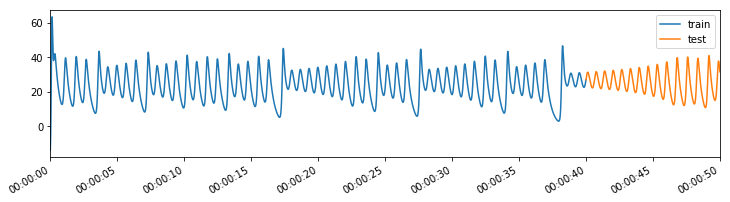

In [56]:
from matplotlib import pyplot as plt

# Establecer un punto de separación de datos de entrenamiento y datos de prueba
split_date = pd.Timestamp('1970-01-01 00:00:40')

train = lorenz_df.Z.loc[:split_date]
test = lorenz_df.Z.loc[split_date:]

plt.figure(figsize=(12, 3))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

A continuación, es conveniente cambiar la escala de los valores en el conjunto de datos al rango [-1, 1]:

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train.values.reshape(-1, 1))
test_sc = scaler.transform(test.values.reshape(-1, 1))

El objetivo del análisis de series de tiempo, es realizar la predicción de una variable en términos de un conjunto de datos previos. Las técnicas convencionales de reconocimiento de patrones requieren recibir como entradas las "variables dependientes", esto es las variables que determinan el valor de la variable independiente. De manera que, para utilizar estas técnicas sin modificación, es necesario generar un conjunto de 'casos', cada uno con un vector de entrada y un valor de salida. El vector de entrada se construye tomando una ventana de valores previos al valor objetivo, de manera que, si el valor a predecir es $y = z(t)$, entonces el vector de entrada es $\vec X = \left(z(t-n), \ldots z(t-2), z(t-1) \right)$, siendo $n$ el número de datos previos a considerar:

<img src="images/neuron13.png" width="90%"> <br>

En la siguiente celda se construyen los casos de entrenamiento, seleccionando los valores de salida y los vectores de entrada, a partir de la serie de tiempo:

In [17]:
# Tamaño de la ventana de datos previos
win_size = 12

train_size = len(train_sc) - win_size
X_train = np.array([train_sc[i:i+win_size].ravel() for i in range(train_size)] )
y_train = np.array([train_sc[i+win_size] for i in range(train_size) ]).ravel()

test_size = len(test_sc) - win_size
X_test = np.array([test_sc[i:i+win_size].ravel() for i in range(test_size) ])
y_test = np.array([test_sc[i+win_size] for i in range(test_size)]).ravel()

La creación del modelo de red neuronal es similar al utilizado en los casos previos, utilizando el tamaño de la ventana de datos previos como longitud de la entrada:

In [34]:
#from keras.optimizers import Adam

# create the model
modelLorenz = Sequential()
modelLorenz.add(Dense(12, input_dim=win_size, activation='relu'))
modelLorenz.add(Dense(18, activation='relu'))
modelLorenz.add(Dense(9, activation='relu'))
modelLorenz.add(Dense(3, activation='relu'))
modelLorenz.add(Dense(1, activation='tanh'))

# compile the model
modelLorenz.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

La *detención temprana* es una técnica de regularización cuyo objetivo es evitar el sobreentrenamiento de un método de aprendizaje automático, como las redes neuronales. Este método realiza un proceso de monitoreo sobre algún indicador de calidad y detiene el entrenamiento cuando este indicador empieza a degradarse. El monitoreo puede realizarse sobre los datos de entrenamiento o sobre un conjunto de datos de evaluación.

En este ejemplo, se utiliza una condición de detención temprana basada en el error cuadrático medio sobre datos de evaluación ('*val_mse*'). De acuerdo a los parámetros establecidos, el algoritmo de entrenamiento se detendrá después de 5 épocas sin observar mejora en el '*val_mse*' (*patience=5*) y el algoritmo de entrenamiento deberá emplear el 30% de los datos para esta validación ('validation_split=0.3'):

In [35]:
from keras.callbacks import EarlyStopping

# Detener el entrenamiento después de n épocas sin mejora
early_stop = EarlyStopping(monitor='val_mse', patience=5, verbose=1)

history = modelLorenz.fit(X_train, y_train, epochs=500, batch_size=10, verbose=0, 
                          callbacks=[early_stop], validation_split=0.3, shuffle=False)

Finalmente, para evaluar la calidad del modelo final, se utiliza el indicador $R^2$ o *coeficiente de determinación*. El coeficiente $R^2$ es una medida estadística sobre la calidad de la aproximación obtenida por un algoritmo de regresión, con respecto a los valores reales. Un valor de $R^2=1$ indica que las predicciones se ajustan perfectamente a los datos.

In [36]:
from sklearn.metrics import r2_score

y_pred = modelLorenz.predict(X_test).ravel()
print("Coeficiente de determinación R2 en el conjunto de datos: {:0.3f}"
      .format(r2_score(y_test, y_pred)))

Coeficiente de determinación R2 en el conjunto de datos: 1.000


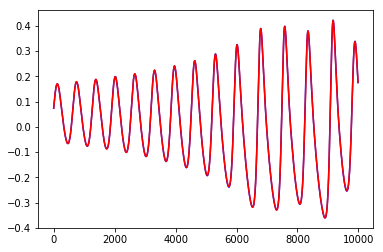

In [59]:
plt.plot(y_pred, 'b')
plt.plot(y_test, 'r')